Step 1: Import Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


Step 2: Load the Dataset

In [129]:
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [130]:
print(df.shape)


(1000, 8)


In [132]:
print(df.shape[1])

8


In [133]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.head(3)

Step 3: Exploratory Data Analysis (EDA)

In [135]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [136]:
# Get basic descriptive statistics
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


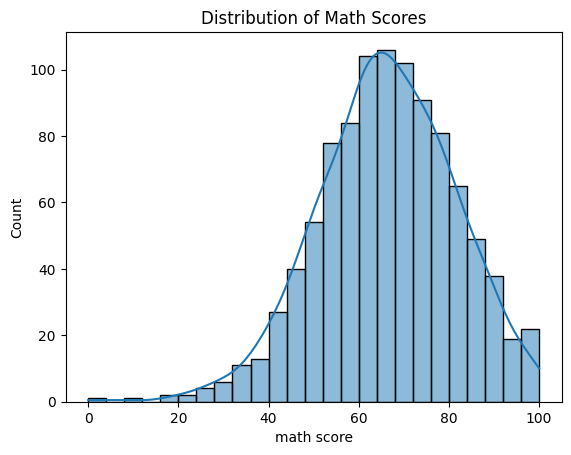

In [137]:
# Visualize the correlation between numeric features (Math, Reading, Writing scores)


# Check the distribution of scores
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()


In [ ]:
df.columns

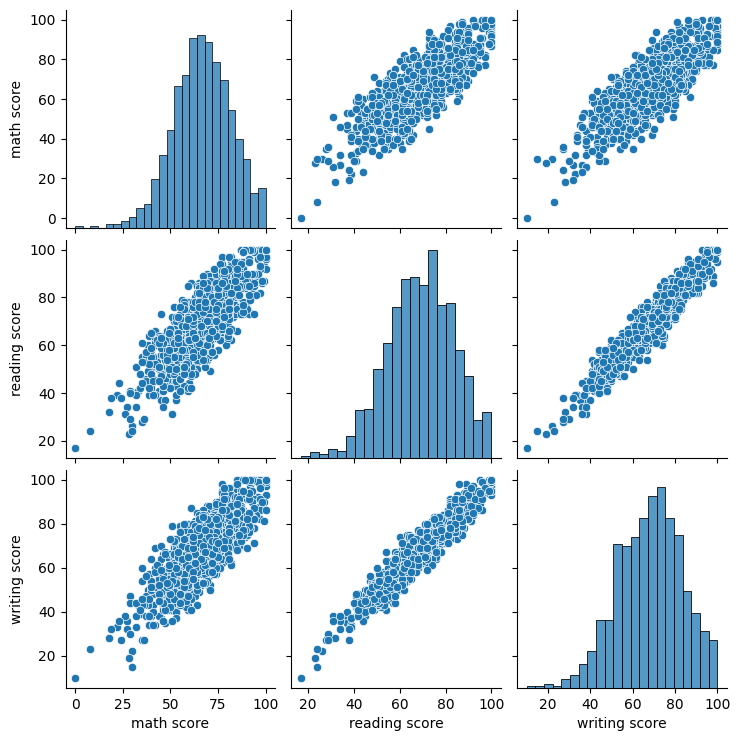

In [138]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

## 1. Check Linearity:

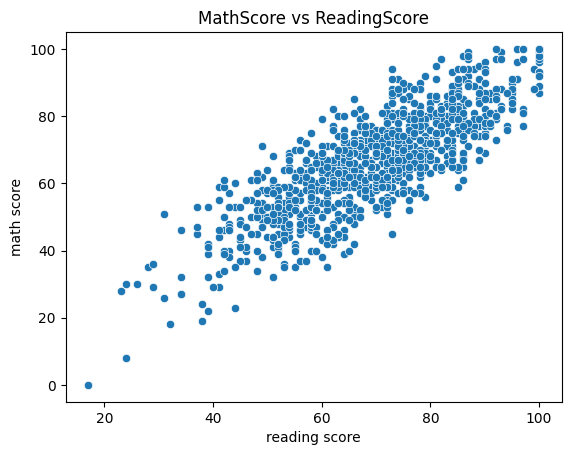

In [139]:
# Or scatter plot for a specific feature
sns.scatterplot(data=df, x='reading score', y='math score')
plt.title("MathScore vs ReadingScore")
plt.show()


## 2. Check Multicollinearity

In [140]:
df[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Choose only independent variables (numerical example)
X = df[['reading score', 'writing score']]  # Add more if needed
X_scaled = StandardScaler().fit_transform(X)

# Calculate VIF
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]

print(vif)


         feature        VIF
0  reading score  11.268556
1  writing score  11.268556


####  VIF = 1: No multicollinearity
#### VIF > 5: Moderate correlation (might be a concern)
#### VIF > 10: Serious multicollinearity — consider dropping/combining variables

Step 4: Spliting Data

In [142]:
##4.2 Split the Data into Features and Target

X = df[['reading score']]
y = df['math score']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 5: Model Building - Linear regression

In [143]:
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [144]:
# Coefficients of the model
print("Coefficients:", model.coef_)

# Intercept (bias term)
print("Intercept:", model.intercept_)


Coefficients: [0.84652915]
Intercept: 7.615915147722099


In [145]:
print("Shape of y:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y: (200,)
Shape of y_pred: (200,)


Step 6: Evaluate the Model

Mean Absolute Error (MAE): 7.280881770618455
Mean Squared Error (MSE): 77.75953982761706


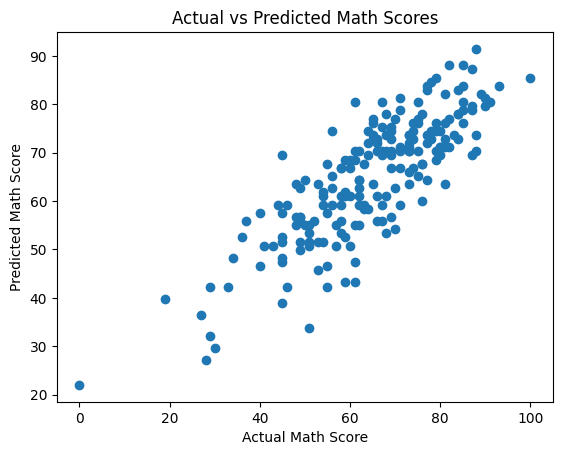

In [146]:
# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Plot actual vs predicted Math Scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.show()



3. Check Homoscedasticity:

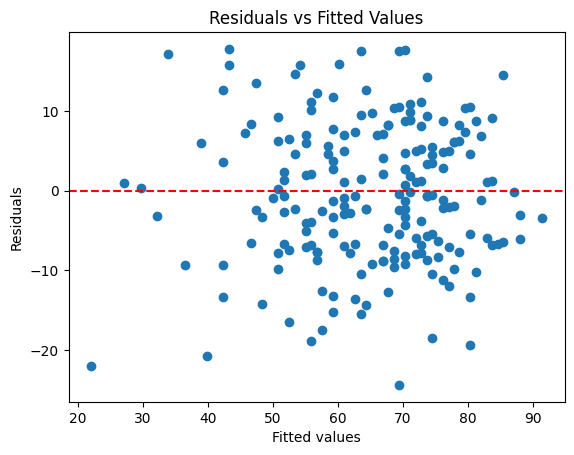

In [147]:
# Residuals
y = np.array(y)
residuals = y_test  - y_pred

# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [148]:
import pickle

# Save the model to a file
with open('linearReg_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Step 7: Interpretation of Results
MAE and MSE values will give you an idea of how well your model is predicting the Math Score.
A scatter plot of actual vs. predicted scores helps visually assess how closely the predictions match the true values.